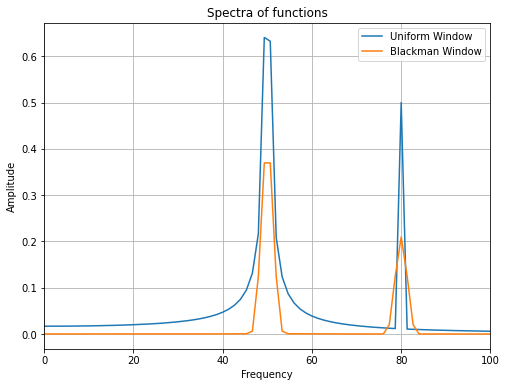

In [3]:
from scipy.fft import fft, fftfreq
import numpy as np

# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800

x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50* 2.0*np.pi*x) + 0.5*np.sin(80 * 2.0*np.pi*x)

yf = fft(y)
xf = fftfreq(N, T)[:N//2]

from scipy.signal.windows import blackman
w = blackman(N)
ywf = fft(y*w)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label = "Uniform Window")
plt.plot(xf, 2.0/N * np.abs(ywf[0:N//2]), label = "Blackman Window")
plt.title("Spectra of functions")
plt.xlim(0, 100)
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.legend()
plt.grid()
plt.show()

In [103]:
# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800

x = np.linspace(0, N*T, N, endpoint=False)
y = np.sin(50* 2.0*np.pi*x) + 0.5*np.sin(80 * 2.0*np.pi*x)

from scipy.signal.windows import blackman
w = blackman(N)
yb = y*w

x = np.linspace(-1*N*T, N*T, 3*N, endpoint=False)
y = np.append(np.zeros(N), np.append(y,np.zeros(N)))
yb = np.append(np.zeros(N), np.append(yb,np.zeros(N)))

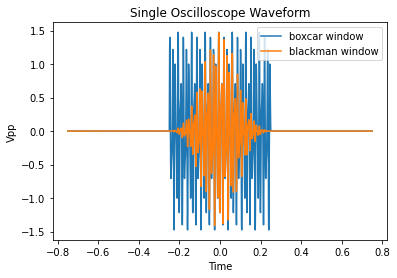

In [104]:
plt.plot(x,y, label= "boxcar window")
plt.plot(x, yb, label = "blackman window")
plt.title("Single Oscilloscope Waveform")
plt.xlabel("Time")
plt.ylabel("Vpp")
plt.legend()
plt.show()

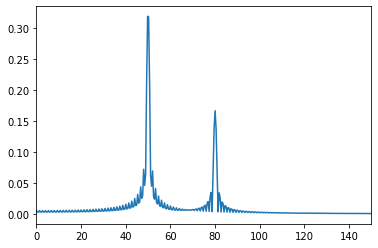

In [105]:
x = x * (3/2)
yf = fft(y)
xf = fftfreq(len(x), (x[-1]-x[0])/len(x))[:len(x)//2]
plt.plot(xf, 2.0/len(x) * np.abs(yf[0:len(x)//2]))
plt.xlim(0,150)
plt.show()

In [44]:
import vxi11
inst = vxi11.Instrument('TCPIP0::169.254.161.170::INSTR')
print(inst.ask('*IDN?'))

Rigol Technologies,DG4162,DG4E252901529,00.01.14


In [45]:
val_str_1 = ",".join(map(str,yb))
frequency = 50e3 #500kHz
period = 1/frequency

v_high_1 = 1.5
v_low_1 = -1*v_high_1

inst.write("SOURCE1:TRACE:DATA VOLATILE,"+ val_str_1)
inst.write("SOURCE1:VOLTAGE:UNIT VPP")
inst.write("SOURCE1:VOLTAGE:LOW {:f}".format(v_low_1))
inst.write("SOURCE1:VOLTAGE:HIGH {:f}".format(v_high_1))
inst.write("SOURCE1:PERIOD {:f}".format(period))

In [135]:
x, y = np.genfromtxt("data/Mar3_Unwindowed_Wave.csv", delimiter = ",").transpose()[:,1:]
xw, yw = np.genfromtxt("data/Mar3_Windowed_Wave.csv", delimiter = ",").transpose()[:,1:]
x = x * 50e3*2.23
xw = xw * 50e3*2.23

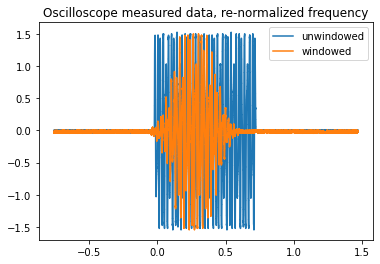

In [137]:
plt.plot(x,y, label = "unwindowed")
plt.plot(xw,yw, label = "windowed")
plt.title("Oscilloscope measured data, re-normalized frequency")
plt.xlabel("Time")
plt.ylabel("Vpp")
plt.legend()
plt.show()


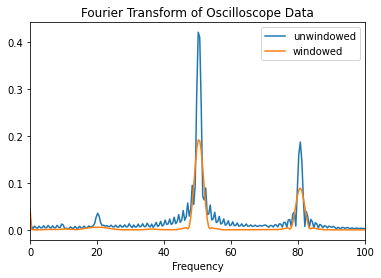

In [140]:
yf = fft(y)
xf = fftfreq(len(x), (x[-1]-x[0])/len(x))[:len(x)//2]
plt.plot(xf, 2.0/len(x) * np.abs(yf[0:len(x)//2]), label = "unwindowed")
plt.xlim(0,100)

ywf = fft(yw)
xwf = fftfreq(len(xw), (xw[-1]-x[0])/len(xw))[:len(xw)//2]
plt.plot(xwf, 2.0/len(xw) * np.abs(ywf[0:len(x)//2]), label = "windowed")
plt.legend()
plt.title("Fourier Transform of Oscilloscope Data")
plt.xlabel("Frequency")
plt.show()